# ML Project

*  Excellent wine company wants to develop ML model for *predicting wine quality* (Regression) on certain *physiochemical characteristics* in order to replace expensive quality sensor.
*  Let's understand steps involved in addressing this problem.

## Steps in ML projects

1. Get the data.
2. Discover and visualize the data to gain insights.
3. Prepare the data for Machine Learning algorithms.
4. Select a model and train it.

## NOTE:

*  ML is usually a small piece in a big project. e.g. wine quality prediction is a small piece in setting up the manufacturing process.
*  Typically 10-15% of time is spent on ML.
*  A lot more time is spent on capturing and processing data needed for ML and taking decisions based on output of ML module.
*  Needs strong collaboration with domain experts, product managers and eng-teams for successful execution.

## Frame the problem

*  What is input and output?
*  What is the business objective? How does company expects to use and benefit from the model?  

## Selection of performance measure

* Regression
  *  Mean Squared Error (MSE) or
  *  Mean Absolute Error (MAE)


# Step 1: Get the data


In [ ]:
#@title Load basic libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv(data_url, sep=";")

Now that the data is loaded, let's examine it.

### 1.1 Check data samples

Let's look at a few data samples with `head()` method.

In [ ]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### 1.2 Features

(Credits:https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009)

| Feature           | Significance  |
| ----------------- | ------------- |
| Fixed acidity     | Most acids involved with wine or fixed or nonvolatile (do not evaporate readily)  |
| Volitile acidity  | The amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste  |
| Citric acid       |  Found in small quantities, citric acid can add 'freshness' and flavor to wines     |
| Residual sugar    |  it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet. |
| Chlorides         |  The amount of salt in the wine. |
| Free sulphur dioxide | The free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine. |
| Total sulphur dioxide | Amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine. |
| Density           |  The density of water is close to that of water depending on the percent alcohol and sugar content. |
| pH                |  Describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale.              |
| Sulphates         | Wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant. |
| Alcohol           | The percentage of alcohol contents in the wine.              |

In [ ]:
print(data.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [ ]:
feature_list = data.columns[:-1].values
label = [data.columns[-1]]

print ("Feature list:", feature_list)
print ("Label:", label)

Feature list: ['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol']
Label: ['quality']


### 1.3 Data statistics

Let's use `info()` method to get quick description of data.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


* Total entries: 1599  (Tiny dataset by ML standard)
* There are total 12 columns: 11 features + 1 label
  * Label column: `quality`
  * Features: `[fixed acidity, volitile acidity, citric acid, residual sugar, cholrides, free sulphur dioxide, total sulphur dioxide, density, pH, sulphates, alcohol]`
* All columns are numeric (float64) and label is an integer.

In order to understand nature of numeric attribites, we use `describe()` method.

In [ ]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


This one prints count and statistical properties - mean, standard deviations and quartiles.

The wine quality can be between 0 and 10, but in this dataset, the quality values are between 3 and 8.  Let's look at the distribution of examples by the wine quality.

In [ ]:
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

*  High quality value --> better quality of wine
*  You can see that there are lots of samples of average wines than good or the poor quality ones.  
    * Many examples with quality = 5 or 6

The information can be viewed through `histogram` plot.  

Text(0, 0.5, 'Count')

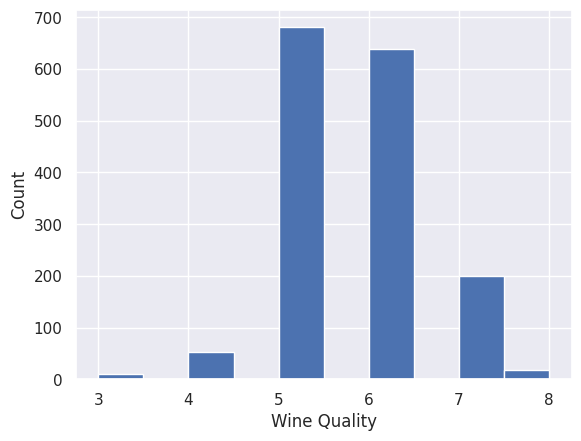

In [ ]:
sns.set()
data.quality.hist()
plt.xlabel('Wine Quality')
plt.ylabel('Count')

Note taller bars for quality 5 and 6 compared to the other qualities.

In a similar manner, we can plot all numerical attributes with histogram plot for quick examination.

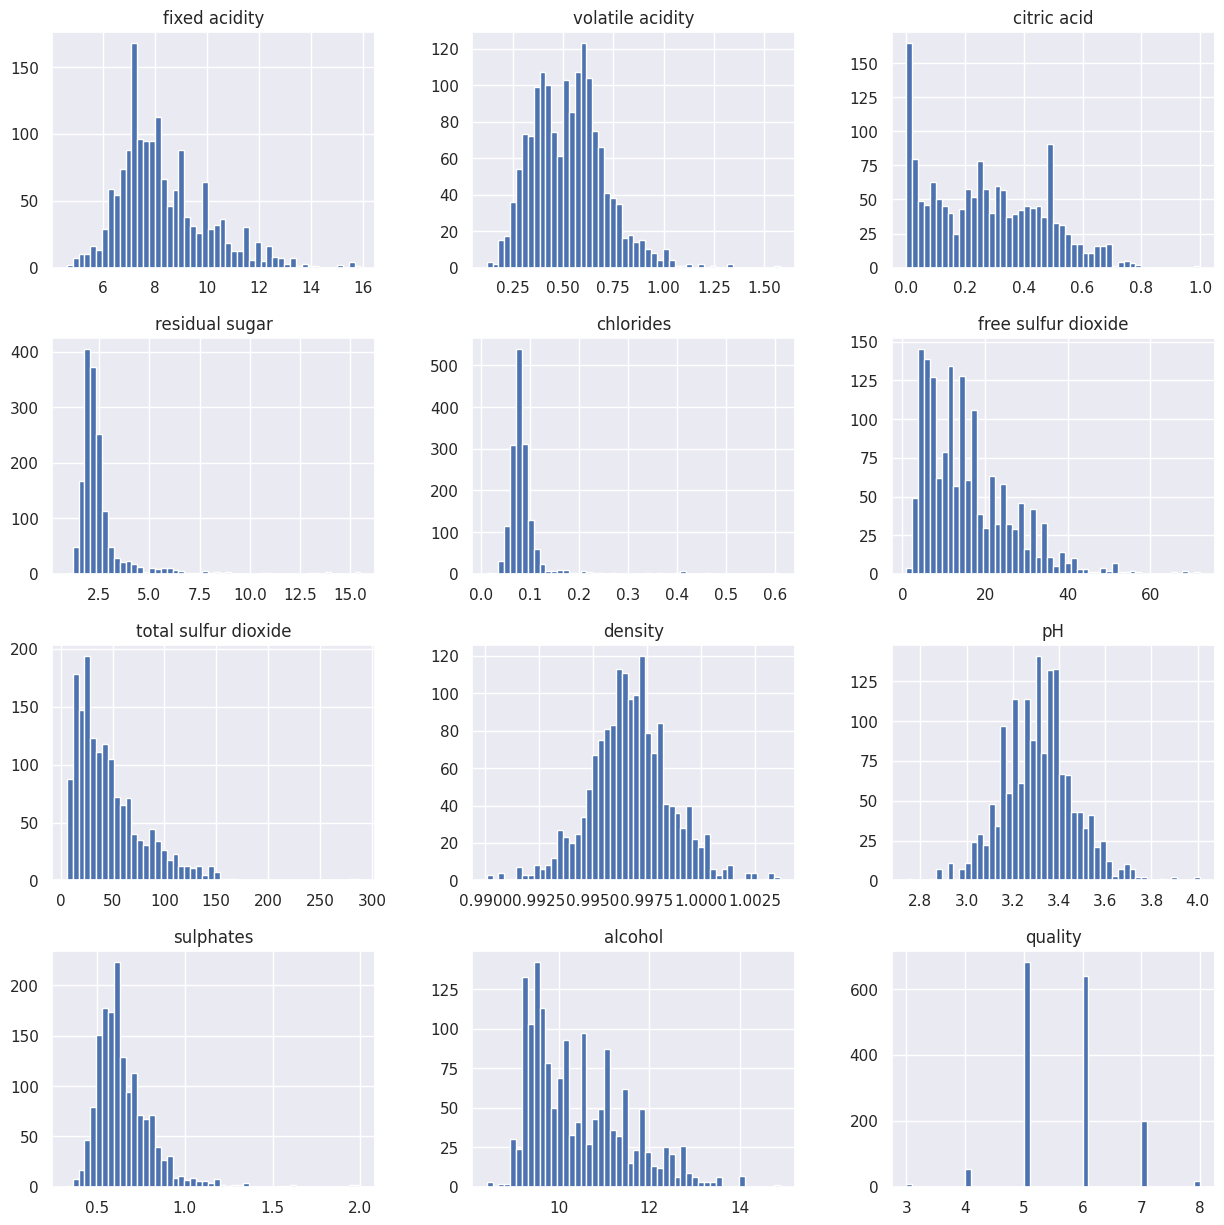

In [ ]:
data.hist(bins=50,figsize=(15,15))
# display histogram
plt.show()

A few observations based on these plots:

1. Features are at different scales.
2. Features have different distributions -
  *  A few are tail heavy. e.g. *residual sugar, free so2*
  *  A few are multiple modes. e.g. *volitile acidity*, *citric acid*

Before any further exploration, it's a good idea to separate test set and do not look at it in order to have a clean evaluation set.

## 1.4 Create train and test set

Scikit-Learn provides a few functions for creating test sets based on
1.  **Random sampling**, which randomly selects $k$% points in the test set.
2.  **Stratified sampling**, which samples test examples such that they are representative of overall distribution.

#### Random sampling

*  `train_test_split` function performs random sampling with
    * `random_state` parameter to set the random seed, which ensures that the same examples are selected for test sets across runs.
    * `test_size` parameter for specifying size of the test set.
    * `shuffle` flag to specify if the data needs to be shuffled before splitting.

* Provision for processing multiple datasets with an identical # rows and selecting the same indices from these datasets.
    *  Useful when labels are in different dataframe.

In [ ]:
from sklearn.model_selection import train_test_split

We can read the documentation for this function by using the following line of code:

In [ ]:
# ?train_test_split

Let's perform random sampling on our dataset:

In [ ]:
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

# Step 2: Data visualization

* Performed on training set.


In [ ]:
exploration_set = train_set.copy()

#### Relationship between features

*  **Standard correlation coefficient** between features.
  *  Ranges between -1 to +1
    * **Correlation = +1**: Strong positive correlation between features
    * **Correlation = -1**: Strong negative correlation between features
    * **Correlation = 0**: No linear correlation between features
  * Visualization with heat map


Let's calculate correlations between our features.

In [ ]:
corr_matrix = exploration_set.corr()

Let's check features that are correlated with the label, which is `quality` in our case.

In [ ]:
corr_matrix['quality']

fixed acidity           0.122488
volatile acidity       -0.378372
citric acid             0.216115
residual sugar          0.005425
chlorides              -0.126541
free sulfur dioxide    -0.055860
total sulfur dioxide   -0.200067
density                -0.167091
pH                     -0.045185
sulphates               0.242596
alcohol                 0.472676
quality                 1.000000
Name: quality, dtype: float64

Notice that `quality` has strong positive correlation with `alcohol` content [0.48] and strong negative correlation with `volitile acidity` [-0.38].

Let's visualize correlation matrix with heatmap:

<Axes: >

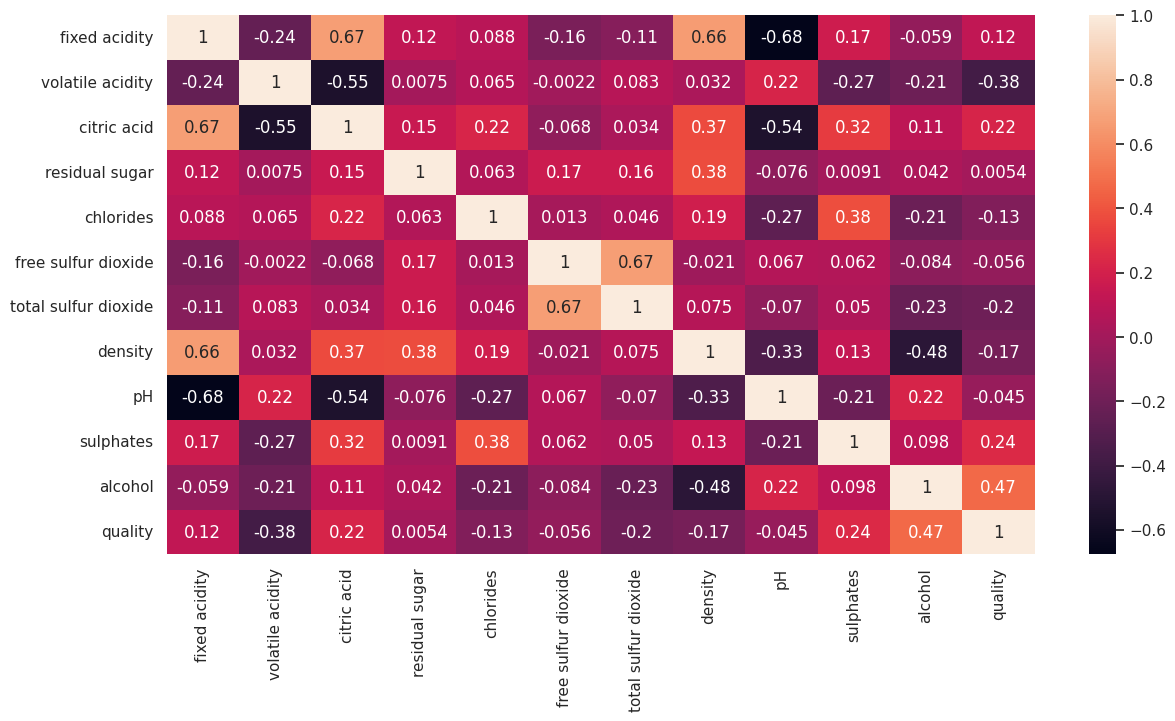

In [ ]:
plt.figure(figsize=(14,7))
sns.heatmap(corr_matrix, annot=True)

You can notice:
* The correlation coefficient on digonal is +1.
* Darker colors represent negative correlations, while fainter colors denote positive correlations.  For example
  * `citric acid` and `fixed acidity` have strong positive correlation.
  * `pH` and `fixed acidity` have strong negative correlation.


#### Note:
 Exploration is an iterative process: Once we build model and obtain more insights, we can come back to this step.

# Step 3: Prepare data for ML algorithm

We often need to preprocess the data before using it for model building due to variety of reasons:
* Due to errors in data capture, data may contain outliers or missing values.  
* Different features may be at different scales.


Typical steps in data preprocessing are as follows:

1. Separate features and labels.
2. Handling missing values and outliers.
3. Feature scaling to bring all features on the same scale.
4. Applying certain transformations like log, square root on the features.

It's a good practice to make a copy of the data and apply preprocessing on that copy.  This ensures that in case something goes wrong, we will at least have original copy of the data intact.

### 3.1 Separate features and labels from the training set.

In [ ]:
# Copy all features leaving aside the label.
wine_features = train_set.drop("quality", axis=1)

# Copy the label list
wine_labels = train_set['quality'].copy()

### 3.2 Data cleaning

Let's first check if there are any missing values in feature set:  One way to find that out is column-wise.

In [ ]:
wine_features.isna().sum() # counts the number of NaN in each column of wine_features

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In this dataset, we do not have any missing values.

In case, we have non-zero numbers in any columns, we have a problem of missing values.

*  These values are missing due to errors in recording or they do not exist.
*  If they are not recorded:
  * Use imputation technique to fill up the missing values.
  * Drop the rows containing missing values.
* If they do not exists, it is better to keep it as `NaN`.

Pandas provides the following methods to drop rows containing missing values:
* `dropna()`
* `drop()`

Sklearn provides `SimpleImputer` class for filling up missing values with. say, `median` value.

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

The `strategy` contains instructions as how to replace the missing values.  In this case, we specify that the missing value should be replaced by the median value.  

In [ ]:
imputer.fit(wine_features)

SimpleImputer(strategy='median')

In case, the features contains non-numeric attributes, they need to be dropped before calling the `fit` method on imputer object.

Let's check the statistics learnt by the imputer on the training set:

In [ ]:
imputer.statistics_

array([ 7.9   ,  0.52  ,  0.26  ,  2.2   ,  0.08  , 14.    , 38.    ,
        0.9968,  3.31  ,  0.62  , 10.2   ])

Note that these are median values for each feature.  We can cross-check it by calculating median on the feature set:

In [ ]:
wine_features.median()

fixed acidity            7.9000
volatile acidity         0.5200
citric acid              0.2600
residual sugar           2.2000
chlorides                0.0800
free sulfur dioxide     14.0000
total sulfur dioxide    38.0000
density                  0.9968
pH                       3.3100
sulphates                0.6200
alcohol                 10.2000
dtype: float64

Finally we use the trained imputer to transform the training set such that the missing values are replaced by the medians:

In [ ]:
tr_features = imputer.transform(wine_features)

This returns a Numpy array and we can convert it to the dataframe if needed:

In [ ]:
tr_features.shape

(1279, 11)

In [ ]:
wine_features_tr = pd.DataFrame(tr_features, columns=wine_features.columns)

### 3.3 Handling text and categorical attributes



#### 3.3.1 Converting categories to numbers (if present):
- One Hot Encoding(nominal data)
- Ordinal Encoding(ordinal data)

### 3.4 Feature Scaling

*  Most ML algorithms do not perform well when input features are on very different scales.
*  Scaling of target label is generally not required.

#### Standardization

*  We subtract mean value of each feature from the current value and divide it by the standard deviation so that the resulting feature has a unit variance.
*  Scikit-Learn provides `StandardScalar` transformation for feature standardization.

*  Note that all these transformers are learnt on the **training data** and then applied on the training and test data to tranform them.
*  **Never learn these transformers on the full dataset**.

### Transformation Pipeline

*  Scikit-Learn provides a `Pipeline` class to line up transformations in an intended order.
*  Here is an example pipeline:

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

transform_pipeline = Pipeline([
                               ('imputer', SimpleImputer(strategy="median")),
                               ('std_scaler', StandardScaler()),])
wine_features_tr = transform_pipeline.fit_transform(wine_features)

Let's understand what is happening here:

*  `Pipeline` has a sequence of transformations - missing value imputation followed by standardization.   
*  Each step in the sequence is defined by *name, estimator* pair.
*  Each name should be unique and should not contain `__` (double underscore).
*  The output of one step is passed on the next one in sequence until it reaches the last step.  
   *  Here the pipeline first performs imputation of missing values and its result is passed for standardization.
*  The pipeline exposes the same method as the final estimator.
   *  Here `StandardScalar` is the last estimator and since it is a transformer, we call `fit_transform()` method on the `Pipeline` object.

# Step 4: Select and train ML model

Training a Linear Regression model

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

#call fit method on train data and labels
lin_reg.fit(wine_features_tr, wine_labels)

LinearRegression()

Now that we have a working model of a regression, let's evaluate performance of the model on training as well as test sets.
*  For regression models, we user `mean squared error` as an evaluation measure.

In [ ]:
from sklearn.metrics import mean_squared_error

quality_predictions =  lin_reg.predict(wine_features_tr)
mean_squared_error(wine_labels, quality_predictions)

0.4241911573139901

Let's evaluate performance on the test set.
*  We need to first apply transformation on the test set and then apply the model prediction function.

In [ ]:

# copy all features leaving aside the label.
wine_features_test = test_set.drop("quality", axis=1)

# copy the label list
wine_labels_test = test_set['quality'].copy()

# apply transformations
wine_features_test_tr = transform_pipeline.fit_transform(wine_features_test)

# call predict function and calculate MSE.
quality_test_predictions = lin_reg.predict(wine_features_test_tr)
mean_squared_error(wine_labels_test, quality_test_predictions)

0.39078829344525523

Let's visualize the error between the actual and predicted values.

Text(0, 0.5, 'Predicted quality')

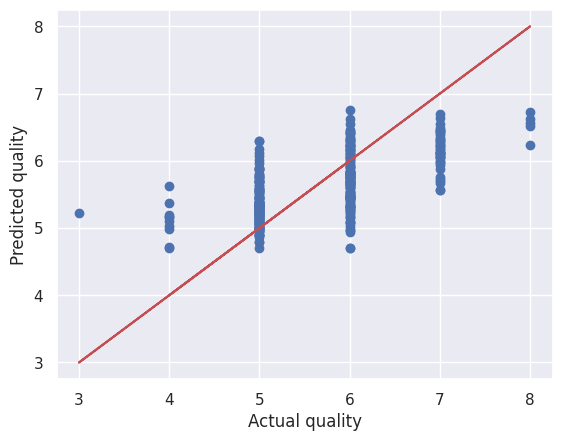

In [ ]:
plt.scatter(wine_labels_test, quality_test_predictions)
plt.plot(wine_labels_test, wine_labels_test, 'r-')
plt.xlabel('Actual quality')
plt.ylabel('Predicted quality')

The model seem to be making errors on the best and poor quality wines.

<h1 align='center'> Thank You </h1>